In [ ]:
# Author: Pamela Tan
# Date: 2022/09/01

# <center>Using SQL with Python dataframes and Pandas via pandasql</center>
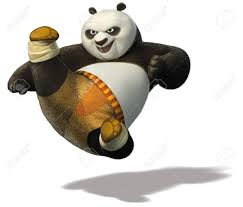
# </center>Using Pandasql</center>
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on the top of Python Programming language. That’s why Pandas is a widely-used data analysis and manipulation library for Python.

# Use Cases
- Don't want to use SQL database tables but want to use SQL
- Data fits in memory
- Volume of data not a performance issue
- Don't need a fully functional SQL Server database

In [85]:
import pandas as pd
from pandasql import sqldf
from pandasql import load_births

births = load_births()

print(sqldf("SELECT * FROM births where births > 250000 limit 5;", locals()))

                         date  births
0  1975-01-01 00:00:00.000000  265775
1  1975-03-01 00:00:00.000000  268849
2  1975-05-01 00:00:00.000000  254545
3  1975-06-01 00:00:00.000000  254096
4  1975-07-01 00:00:00.000000  275163


In [92]:
# a query to use multiple lines
q = """
      select
        date(date) as DOB,
        sum(births) as "Total Births"
      from
        births
      group by
        date
        limit 10;  
"""
print(sqldf(q, locals()))


          DOB  Total Births
0  1975-01-01        265775
1  1975-02-01        241045
2  1975-03-01        268849
3  1975-04-01        247455
4  1975-05-01        254545
5  1975-06-01        254096
6  1975-07-01        275163
7  1975-08-01        281300
8  1975-09-01        270738
9  1975-10-01        265494


In [90]:

# this is the script to call global variable 
def pysqldf(q):
    
    return sqldf(q, globals())

In [89]:
print(sqldf(q, globals()))

          DOB  Total Births
0  1975-01-01        265775
1  1975-02-01        241045
2  1975-03-01        268849
3  1975-04-01        247455
4  1975-05-01        254545
5  1975-06-01        254096
6  1975-07-01        275163
7  1975-08-01        281300
8  1975-09-01        270738
9  1975-10-01        265494


In [31]:
#Steps to read a CSV file:

#1. Import the csv library

import csv

In [32]:
#2. Open the CSV file
#The .open() method in python is used to open files and return a file object
#The type of file is “_io.TextIOWrapper” which is a file object that is returned by the open() method.

file = open('DimCustomer.csv')

type(file)

_io.TextIOWrapper

In [34]:
#3. Use the csv.reader object to read the CSV file

csvreader = csv.reader(file)

In [35]:
#4. Extract the field names
#Create an empty list called header. Use the next() method to obtain the header.

#The .next() method returns the current row and moves to the next row.

#The first time you run next() it returns the header and the next time you run it returns the first record and so on.

header = []
header = next(csvreader)
header



['ï»¿CustomerKey',
 'GeographyKey',
 'CustomerAlternateKey',
 'Title',
 'FirstName',
 'MiddleName',
 'LastName',
 'NameStyle',
 'BirthDate',
 'MaritalStatus',
 'Suffix',
 'Gender',
 'EmailAddress',
 'YearlyIncome',
 'TotalChildren',
 'NumberChildrenAtHome',
 'EnglishEducation',
 'SpanishEducation',
 'FrenchEducation',
 'EnglishOccupation',
 'SpanishOccupation',
 'FrenchOccupation',
 'HouseOwnerFlag',
 'NumberCarsOwned',
 'AddressLine1',
 'AddressLine2',
 'Phone',
 'DateFirstPurchase',
 'CommuteDistance']

In [113]:
#5. Extract the rows/records
#Create an empty list called rows and iterate through the csvreader object and append each row to the rows list.

rows = []
for row in csvreader:
        rows.append(row)
rows

[['11000',
  '26',
  'AW00011000',
  'NULL',
  'Jon',
  'V',
  'Yang',
  '0',
  '1971-10-06',
  'M',
  'NULL',
  'M',
  'jon24@adventure-works.com',
  '90000.00',
  '2',
  '0',
  'Bachelors',
  'Licenciatura',
  'Bac + 4',
  'Professional',
  'Profesional',
  'Cadre',
  '1',
  '0',
  '3761 N. 14th St',
  'NULL',
  '1 (11) 500 555-0162',
  '2011-01-19',
  '1-2 Miles'],
 ['11001',
  '37',
  'AW00011001',
  'NULL',
  'Eugene',
  'L',
  'Huang',
  '0',
  '1976-05-10',
  'S',
  'NULL',
  'M',
  'eugene10@adventure-works.com',
  '60000.00',
  '3',
  '3',
  'Bachelors',
  'Licenciatura',
  'Bac + 4',
  'Professional',
  'Profesional',
  'Cadre',
  '0',
  '1',
  '2243 W St.',
  'NULL',
  '1 (11) 500 555-0110',
  '2011-01-15',
  '0-1 Miles'],
 ['11002',
  '31',
  'AW00011002',
  'NULL',
  'Ruben',
  'NULL',
  'Torres',
  '0',
  '1971-02-09',
  'M',
  'NULL',
  'M',
  'ruben35@adventure-works.com',
  '60000.00',
  '3',
  '3',
  'Bachelors',
  'Licenciatura',
  'Bac + 4',
  'Professional',
  'Pro

In [36]:
#6. Close the file
#file.close()

In [37]:
# using with statement to automatically release the resources
import csv
rows = []
with open("DimCustomer.csv") as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print(header)
print(rows)

['ï»¿CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'Title', 'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate', 'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation', 'SpanishEducation', 'FrenchEducation', 'EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone', 'DateFirstPurchase', 'CommuteDistance']
[['11000', '26', 'AW00011000', 'NULL', 'Jon', 'V', 'Yang', '0', '1971-10-06', 'M', 'NULL', 'M', 'jon24@adventure-works.com', '90000.00', '2', '0', 'Bachelors', 'Licenciatura', 'Bac + 4', 'Professional', 'Profesional', 'Cadre', '1', '0', '3761 N. 14th St', 'NULL', '1 (11) 500 555-0162', '2011-01-19', '1-2 Miles'], ['11001', '37', 'AW00011001', 'NULL', 'Eugene', 'L', 'Huang', '0', '1976-05-10', 'S', 'NULL', 'M', 'eugene10@adventure-works.com', '60000.00', '3', '3', 'Bachelors', 'Licenciatura', 'Bac + 4', 'Professio

In [38]:
#Steps of reading CSV files using pandas
#CSV stands for “Comma Separated Values.” It is the simplest form of storing data in tabular form as plain text.

import pandas as pd
DimCustomer= pd.read_csv("DimCustomer.csv")
DimCustomer

CustomerKey  GeographyKey CustomerAlternateKey Title  FirstName  \
0            11000            26           AW00011000   NaN        Jon   
1            11001            37           AW00011001   NaN     Eugene   
2            11002            31           AW00011002   NaN      Ruben   
3            11003            11           AW00011003   NaN    Christy   
4            11004            19           AW00011004   NaN  Elizabeth   
...            ...           ...                  ...   ...        ...   
18479        29479           209           AW00029479   NaN      Tommy   
18480        29480           248           AW00029480   NaN       Nina   
18481        29481           120           AW00029481   NaN       Ivan   
18482        29482           179           AW00029482   NaN    Clayton   
18483        29483           217           AW00029483   NaN      Jésus   

      MiddleName LastName  NameStyle   BirthDate MaritalStatus  ...  \
0              V     Yang          0  1971-10-06             M  ...   
1              L    Huang          0  1976-05-10             S  ...   
2            NaN   Torres          0  1971-02-09             M  ...   
3            NaN      Zhu          0  1973-08-14             S  ...   
4            NaN  Johnson          0  1979-08-05             S  ...   
...          ...      ...        ...         ...           ...  ...   
18479          L     Tang          0  1969-06-30             M  ...   
18480          W     Raji          0  1977-05-06             S  ...   
18481        NaN     Suri          0  1965-07-04             S  ...   
18482        NaN    Zhang          0  1964-09-01             M  ...   
18483          L  Navarro          0  1965-06-06             M  ...   

      EnglishOccupation SpanishOccupation FrenchOccupation  HouseOwnerFlag  \
0          Professional       Profesional            Cadre               1   
1          Professional       Profesional            Cadre               0   
2          Professional       Profesional            Cadre               1   
3          Professional       Profesional            Cadre               0   
4          Professional       Profesional            Cadre               1   
...                 ...               ...              ...             ...   
18479          Clerical    Administrativo          Employé               1   
18480          Clerical    Administrativo          Employé               1   
18481          Clerical    Administrativo          Employé               0   
18482          Clerical    Administrativo          Employé               1   
18483          Clerical    Administrativo          Employé               1   

       NumberCarsOwned               AddressLine1 AddressLine2  \
0                    0            3761 N. 14th St          NaN   
1                    1                 2243 W St.          NaN   
2                    1           5844 Linden Land          NaN   
3                    1           1825 Village Pl.          NaN   
4                    4        7553 Harness Circle          NaN   
...                ...                        ...          ...   
18479                0          111, rue Maillard          NaN   
18480                0          9 Katherine Drive          NaN   
18481                0                Knaackstr 4          NaN   
18482                0     1080, quai de Grenelle          NaN   
18483                0  244, rue de la Centenaire          NaN   

                     Phone DateFirstPurchase CommuteDistance  
0      1 (11) 500 555-0162        2011-01-19       1-2 Miles  
1      1 (11) 500 555-0110        2011-01-15       0-1 Miles  
2      1 (11) 500 555-0184        2011-01-07       2-5 Miles  
3      1 (11) 500 555-0162        2010-12-29      5-10 Miles  
4      1 (11) 500 555-0131        2011-01-23       1-2 Miles  
...                    ...               ...             ...  
18479  1 (11) 500 555-0136        2012-09-04       0-1 Miles  
18480  1 (11) 500 555-0146     

In [39]:
#3. Extract the field names
#.columns is used to obtain the header/field names

DimCustomer.columns 


Index(['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'SpanishEducation', 'FrenchEducation', 'EnglishOccupation',
       'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone',
       'DateFirstPurchase', 'CommuteDistance'],
      dtype='object')

In [40]:

pd.set_option('display.max_rows', 5)
print (DimCustomer)



       CustomerKey  GeographyKey CustomerAlternateKey Title FirstName  \
0            11000            26           AW00011000   NaN       Jon   
1            11001            37           AW00011001   NaN    Eugene   
...            ...           ...                  ...   ...       ...   
18482        29482           179           AW00029482   NaN   Clayton   
18483        29483           217           AW00029483   NaN     Jésus   

      MiddleName LastName  NameStyle   BirthDate MaritalStatus  ...  \
0              V     Yang          0  1971-10-06             M  ...   
1              L    Huang          0  1976-05-10             S  ...   
...          ...      ...        ...         ...           ...  ...   
18482        NaN    Zhang          0  1964-09-01             M  ...   
18483          L  Navarro          0  1965-06-06             M  ...   

      EnglishOccupation SpanishOccupation FrenchOccupation  HouseOwnerFlag  \
0          Professional       Profesional            Cad

# <center>Using SQLlite with Python</center>
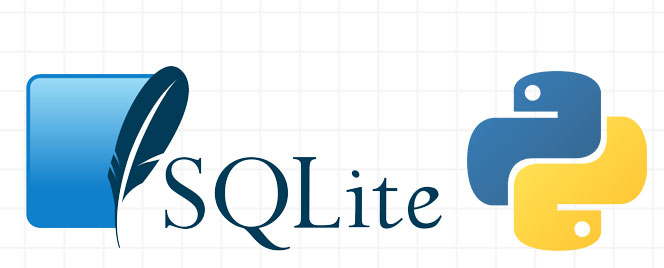

## SQLite is a C library that provides a lightweight disk-based database that doesn’t require a separate server process and allows accessing the database using a nonstandard variant of the SQL query language.

In [16]:
import sqlite3

print(sqlite3.version)
print(sqlite3.sqlite_version)

2.6.0
3.37.2


In [17]:
#1) Connect to the database.  In Memory in this case.

db = sqlite3.connect(':memory:')

In [18]:
#2) Create a cursor to use to execute SQL statements.

cursor = db.cursor()

In [19]:
#3) Use the cursor to execute SQL statements to the database.
#Note:  We always execute a commit after the statement.

cursor.execute('''CREATE TABLE IF NOT EXISTS books(id INTEGER PRIMARY KEY, 
                   title TEXT, author TEXT, price TEXT, year TEXT)
''')
db.commit()


In [20]:
cursor.execute('''INSERT INTO books values (1, 'Learning SQL', 'Alan Beaulieu', 71.00, 2020)
''')
cursor.execute('''INSERT INTO books values (2, "'SQL for Data Analysis", 'Douglas Adams', 102.00, 2021)
''')
db.commit()

In [21]:
lstbooks = cursor.execute('''select * from books;''').fetchall()
db.commit()
print(lstbooks)

[(1, 'Learning SQL', 'Alan Beaulieu', '71.0', '2020'), (2, "'SQL for Data Analysis", 'Douglas Adams', '102.0', '2021')]


In [22]:
#type 
type(lstbooks)

list

In [23]:
#using a dataframe

import sqlite3
import pandas as pd

# convert query results to a dataframe
dfbook = pd.read_sql_query("SELECT * FROM books", db)
dfbook.head()

id                   title         author  price  year
0   1            Learning SQL  Alan Beaulieu   71.0  2020
1   2  'SQL for Data Analysis  Douglas Adams  102.0  2021

In [10]:
#Dropping the table

cursor = db.cursor()
cursor.execute('''DROP TABLE books''')
db.commit()

In [24]:
#check if the table books has been dropped

booksdf = cursor.execute('''select * from books;''').fetchall()
db.commit()

In [27]:
cursor.close()
#conn.close()

## <center>Accessing SQL Server from Python with ODBC </center>

## What Python package should I use?
Connecting to SQL Server requires installing a Python package in your code that supports connections to SQL Server. 

## Connecting to the database
In order to connect to the database you use the connect method of the Connection object.

pypyodbc.connect(‘Driver = {drivername};Server=servername; Database=databaseName; uid=username;pwd=password)

Driver - identifies the driver you wish to use to connect to the database, the correct driver to use will depend on which database product you are using. Since we are using SQL Server, our driver should be SQL Server. 
Server - identifies the server where SQL Server is running. If you are running SQL Server on the same PC where you are running your Python code the server name will be localhost
Database - is the name of your database in SQL Server. I have created a database called IndustryConnect_AdvancedTaskDW.
uid and pwd - are the SQL Server username and password that has permissions to log into the database and perform the desired actions. In this example I am logging in with the default system admin testuser and password Testuser1234.


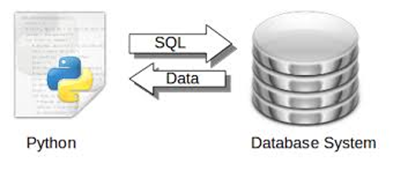

In [42]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL


pg_conn = pyodbc.connect("DRIVER={SQL Server};"
                          "SERVER=localhost;"
                          "DATABASE=IndustryConnect_AdvancedTaskDW;"
                          "UID=testuser;"
                          "PWD=Testuser1234;")
                         
query = '''SELECT * FROM DimGeography'''
                 
df = pd.read_sql(query, pg_conn)

print(df.head(3))

print(type(df))

C:\Users\pamel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


   GeographyKey  Postcode                          Suburb      City  \
0             1     200.0  Australian National University  Canberra   
1             2     221.0                          Barton  Canberra   
2             3     800.0                          Darwin    Darwin   

         District Statecode                         State   Latitude  \
0            None       ACT  Australian Capital Territory -35.277272   
1  South Canberra       ACT  Australian Capital Territory -35.201371   
2          Darwin        NT            Northern Territory -12.801028   

    Longitude  
0  149.117136  
1  149.095065  
2  130.955789  
<class 'pandas.core.frame.DataFrame'>


In [51]:
import pyodbc
import pandas as pd

pg_conn = pyodbc.connect("DRIVER={SQL Server};"
                          "SERVER=localhost;"
                          "DATABASE=AdventureWorks2014;"
                          "UID=testuser;"
                          "PWD=Testuser1234;")

query = '''SELECT * FROM [Person].[Person] WHERE BusinessEntityID = 7'''


df = pd.read_sql(query, pg_conn)

print(df.head(3))

print(type(df))


   BusinessEntityID PersonType  NameStyle Title FirstName MiddleName LastName  \
0                 7         EM      False  None     Dylan          A   Miller   

  Suffix  EmailPromotion AdditionalContactInfo  \
0   None               2                  None   

                                        Demographics  \
0  <IndividualSurvey xmlns="http://schemas.micros...   

                                rowguid ModifiedDate  
0  C45E8AB8-01BE-4B76-B215-820C8368181A   2009-02-01  
<class 'pandas.core.frame.DataFrame'>


C:\Users\pamel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [41]:
import pyodbc
import pandas as pd


pg_conn = pyodbc.connect("DRIVER={SQL Server};"
                          "SERVER=localhost;"
                          "DATABASE=AdventureWorks2014;"
                          "UID=testuser;"
                          "PWD=Testuser1234;")

## this sql statement will show how to get persons with first name equal to Gail.

query = "SELECT   BusinessEntityID, PersonType, FirstName, LastName FROM [Person].[Person] WHERE FirstName = 'Gail' "
 
##Also, we have an example to show all the persons with the last name that ends will the letter l
query2 = "SELECT distinct FirstName, LastName FROM [Person].[Person] WHERE LastName LIKE '%l'"

## the code in parentheses is the subquery.
## a subquery in a where clause that returns 1 row
query3 = """SELECT cat.ProductCategoryID,cat.Name cat_name,subcat.Name subcat_name FROM [AdventureWorks2014].[Production].[ProductCategory] cat 
            INNER JOIN [AdventureWorks2014].[Production].[ProductSubcategory] subcat ON cat.ProductCategoryID = subcat.ProductCategoryID 
            WHERE cat.ProductCategoryID =( SELECT cat.ProductCategoryID
                                        FROM [AdventureWorks2014].[Production].[ProductCategory] cat WHERE cat.ProductCategoryID = 1)"""



df = pd.read_sql(query, pg_conn)

ef = pd.read_sql(query2,pg_conn)

eg = pd.read_sql(query3,pg_conn)

## this will print the first query 
print(df.head(6))

print(type(df))


C:\Users\pamel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


    BusinessEntityID PersonType FirstName   LastName
0              12208         IN      Gail  Alexander
1              12196         IN      Gail     Butler
..               ...        ...       ...        ...
4              12212         IN      Gail    Griffin
5              12044         IN      Gail      Moore

[6 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


C:\Users\pamel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\pamel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [174]:
## this will print the sql query2 return FirstName and LastName
print(ef.head(10))

print(type(ef))

    FirstName   LastName
0   Catherine       Abel
1      Angela  Barbariol
2        Josh   Barnhill
3     Abigail       Bell
4      Adrian       Bell
5        Alex       Bell
6       Alexa       Bell
7   Alexandra       Bell
8  Alexandria       Bell
9     Allison       Bell
<class 'pandas.core.frame.DataFrame'>


In [79]:
## this will print the sql query3 for ProductCategoryid = 1
print(eg.head(3))

print(type(eg))

   ProductCategoryID cat_name     subcat_name
0                  1    Bikes  Mountain Bikes
1                  1    Bikes      Road Bikes
2                  1    Bikes   Touring Bikes
<class 'pandas.core.frame.DataFrame'>
